### Instructor Demo: Beta

This program reads in the daily closing prices of Amazon and the S&P 500 as CSVs and calculates the beta value of Amazon to represent the volatility of Amazon returns relative to the volatility of S&P 500 returns.

In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

### Read CSVs in as DataFrames

In [2]:
# Read the daily closing prices of AMZN, set the `date` as a datetime index
amzn_data = Path("../Resources/amzn_data.csv")
amzn_df = pd.read_csv(amzn_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of S&P 500, set the `date` as a datetime index
sp500_data = Path("../Resources/sp500_data.csv")
sp500_df = pd.read_csv(sp500_data, index_col="date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,close
date,
2014-05-20,1872.829956
2014-05-21,1888.030029
2014-05-22,1892.489990
2014-05-23,1900.530029
2014-05-27,1911.910034


### Combine DataFrames, Sort Index, and Rename Columns

In [3]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([amzn_df, sp500_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Set column names to 'AMZN' and 'S&P 500'
combined_df.columns = ["AMZN", "S&P 500"]

# Display a few rows
combined_df.head()

,AMZN,S&P 500
date,,
2014-05-20,301.19,1872.829956
2014-05-21,305.01,1888.030029
2014-05-22,304.91,1892.489990
2014-05-23,312.24,1900.530029
2014-05-27,310.82,1911.910034


### Calculate Daily Returns

In [5]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = combined_df.pct_change()
daily_returns.head()

,AMZN,S&P 500
date,,
2014-05-20,NaN,NaN
2014-05-21,0.012683,0.008116
2014-05-22,-0.000328,0.002362
2014-05-23,0.024040,0.004248
2014-05-27,-0.004548,0.005988


### Calculate Covariance of AMZN returns vs. S&P 500 returns

In [6]:
# Calculate covariance of all daily returns of AMZN vs. S&P 500
covariance = daily_returns['AMZN'].cov(daily_returns['S&P 500'])
covariance

9.344294535060868e-05

### Calculate Variance of S&P 500 returns

In [7]:
# Calculate variance of all daily returns of AMZN vs. S&P 500
variance = daily_returns['S&P 500'].var()
variance

7.030950113534625e-05

### Calculate Beta of AMZN

In [8]:
# Calculate beta of all daily returns of AMZN
amzn_beta = covariance / variance
amzn_beta

1.3290230173974695

### Calculate 30-Day Rolling Covariance of AMZN Returns vs. S&P 500 Returns

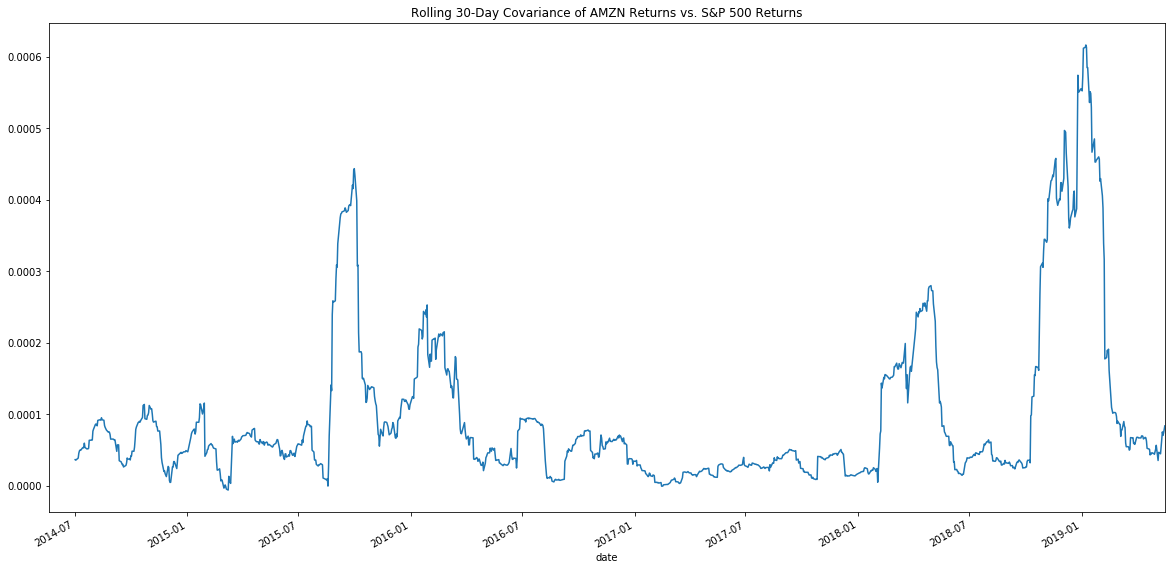

In [9]:
# Calculate 30-day rolling covariance of AMZN vs. S&P 500 and plot the data
rolling_covariance = daily_returns['AMZN'].rolling(window=30).cov(daily_returns['S&P 500'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of AMZN Returns vs. S&P 500 Returns')

### Calculate 30-Day Rolling Variance of S&P 500 Returns

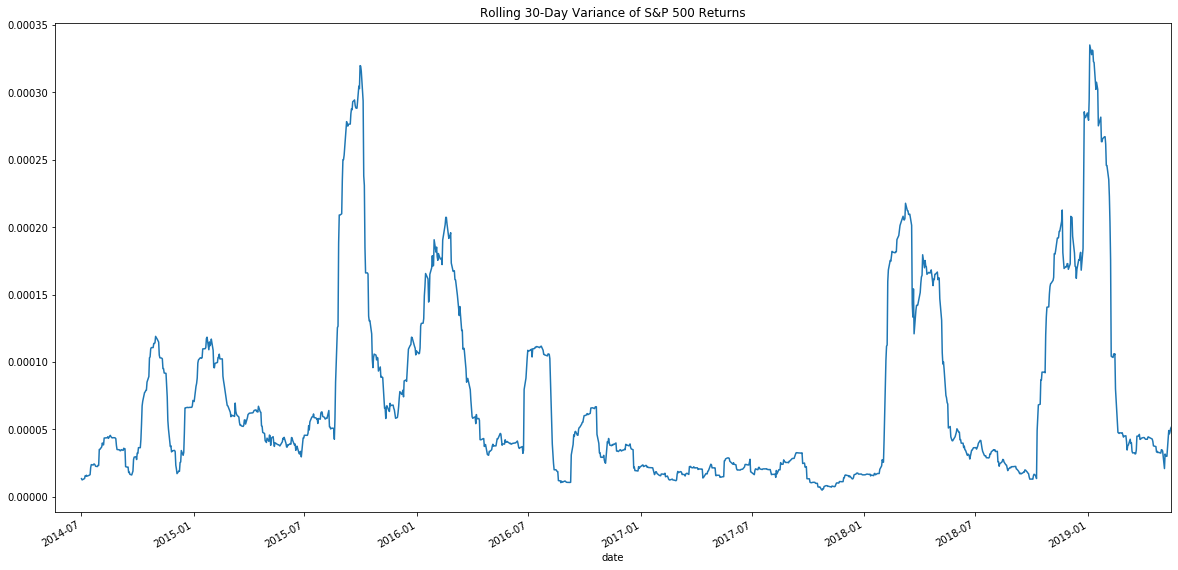

In [10]:
# Calculate 30-day rolling variance of AMZN vs. S&P 500 and plot the data
rolling_variance = daily_returns['S&P 500'].rolling(window=30).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P 500 Returns')

### Calculate 30-Day Rolling Beta of AMZN

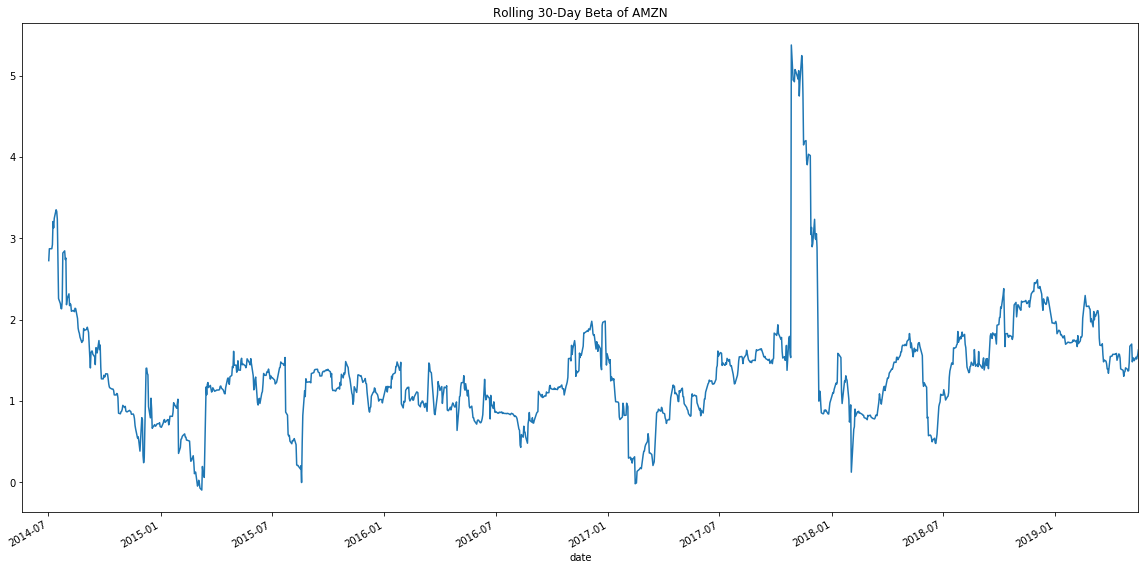

In [12]:
# Calculate 30-day rolling beta of AMZN and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of AMZN')

### Beta vs. Correlation

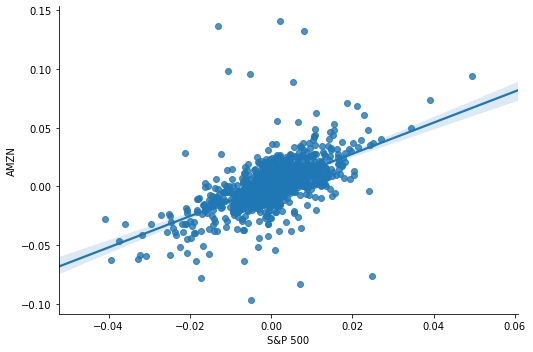

In [13]:
# Showcase beta vs. correlation by plotting a scatterplot using the Seaborn library and fitting a regression line
import seaborn as sns
sns.lmplot(x='S&P 500', y='AMZN', data=daily_returns, aspect=1.5, fit_reg=True)

In [12]:
amzn_beta

1.3290230173974695

In [14]:
daily_returns.corr(method="pearson")

,AMZN,S&P 500
AMZN,1.000000,0.585244
S&P 500,0.585244,1.000000


Note that the Beta value and the correlation do **not** match! Beta is a measure of volatity relative to the market. We would conclude that this stock is approximately 33% more volatile than the market (Beta of 1.329). The Pearson Correlation (which is R, not R-squared) is an indication of the extent of the linear relationship between AMZN and the S&P500. 